Importing all the necessary packages and libraries and converting the json to a csv format

In [1]:

#Umcomment this section to install all the libraries for your local machine or platform
!pip install pandas
!pip install scikit-learn
!pip install numpy
!pip install xgboost
!pip install matplotlib

You should consider upgrading via the '/home/adeola/.virtualenvs/cv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/adeola/.virtualenvs/cv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/adeola/.virtualenvs/cv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/adeola/.virtualenvs/cv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/adeola/.virtualenvs/cv/bin/python -m pip install --upgrade pip' command.


In [2]:
'''This section converts all the JSON in the folder into a big CSV'''

#importing the libraries
import pandas as pd
import numpy as np
import json
import os


path_to_json_folder="./Challenge/visits"

result={}

#Trying to read the element in the json's folder 
for i, ele in enumerate  (os.listdir(path_to_json_folder)):
    #print(ele)
    with open(path_to_json_folder+"/"+ele, "rb") as f:
        res_json=json.load(f)
        #print(res)
        result[i]=res_json
        print("Processed json_{}".format(i))

#Coverts it to a csv to prepare it for modelling
csv_data = pd.DataFrame.from_dict(result, orient='index')
print("Successfully created the csv")
csv_data.to_csv("./dirty_data.csv", index=False)

Processed json_0
Processed json_1
Processed json_2
Processed json_3
Processed json_4
Processed json_5
Processed json_6
Processed json_7
Processed json_8
Processed json_9
Processed json_10
Processed json_11
Processed json_12
Processed json_13
Processed json_14
Processed json_15
Processed json_16
Processed json_17
Processed json_18
Processed json_19
Processed json_20
Processed json_21
Processed json_22
Processed json_23
Processed json_24
Processed json_25
Processed json_26
Processed json_27
Processed json_28
Processed json_29
Processed json_30
Processed json_31
Processed json_32
Processed json_33
Processed json_34
Processed json_35
Processed json_36
Processed json_37
Processed json_38
Processed json_39
Processed json_40
Processed json_41
Processed json_42
Processed json_43
Processed json_44
Processed json_45
Processed json_46
Processed json_47
Processed json_48
Processed json_49
Processed json_50
Processed json_51
Processed json_52
Processed json_53
Processed json_54
Processed json_55
Pr

In [ ]:

'''This is the section that converts the dataset into a machine learning format
removing the attributes we will not use AKA PREPROCESSING'''

#Importing libraries

from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler

dict_network={}
arr_node_conn=[]


#Path to the dirty data to
path_to_csv="./dirty_data.csv"
path_to_nework_list="./Challenge/network.adjlist"


data=pd.read_csv(path_to_csv)
#print(data.head())

#Reading the network
with open(path_to_nework_list, "r") as f:
    strg=f.read()
arr=strg.split("\n")  
#print(arr)  
for ele in arr:
    #array1.append(ele)
    if len(ele) !=0:
        dict_network[ele.split()[0]]=len(ele.split()) -1
    #print(dict_network)

noder=data["node_id"]

for ele in noder:
    arr_node_conn.append(dict_network[ele])

data["number_node"]=arr_node_conn

#remove unwanted attributes
data=data.drop(columns=["fault_id", "node_id", "visit_date:", "original_reported_date", "engineer_note"])
data["visit_id"] = data["visit_id"].astype(int) + 1
#print(data.head())

#print(data.head())
for i in range(1, 6):
    data=data.replace(to_replace =["LEVEL{}".format(i)], value =i)

#Performing Onehotencoding on node_type, fault_type, engineer_skill_level and outcome
one_hot = OneHotEncoder(sparse=False, handle_unknown='ignore')
train_enc = one_hot.fit_transform(data[["node_type","fault_type", "outcome"]])
data_enco=pd.DataFrame(train_enc, columns=one_hot.get_feature_names())

#Performing MinMaxScaling on column visit_id and node_age
scaler = MinMaxScaler()
data_scaled  = scaler.fit_transform(data[["visit_id", "node_age", "engineer_skill_level", "number_node"]]) 
    
#This block combines the header from the scaled and onehotencoding together
onehot_header=list(one_hot.get_feature_names().copy())
data_header=["visit_id", "node_age", "engineer_skill_level", "number_node"]
data_header.extend(onehot_header)

#Combining the scaled and the onehotencoded columns together
combo_data = np.concatenate([data_scaled, data_enco], axis=1)

combo_data = pd.DataFrame(combo_data)

#Changing the header back to a readable format from the 0,1,2 ... format generated after encoding
combo_data = combo_data.rename(columns={ i: data_header[i] for i in range (len(data_header))})

#Dropping the extra column for the binary outcome FAIL
combo_data = combo_data.drop(columns=["x2_FAIL"])

# arr=combo_data["x3_SUCCESS"]
# count=0
# for ele in arr:
#     if ele==1:
#         count+=1
# print(count)


print("\nSucessfully preprocessed the dataset and created a machine learning ready csv")

combo_data.to_csv("./ml_ready.csv", index=False)

   

   visit_id  node_age  x0_TYPE1  x0_TYPE2  x0_TYPE3  x0_TYPE4  x0_TYPE5  \
0  0.000000      0.75       0.0       0.0       0.0       1.0       0.0   
1  0.000000      0.85       1.0       0.0       0.0       0.0       0.0   
2  0.142857      0.40       0.0       0.0       0.0       0.0       1.0   
3  0.000000      0.10       1.0       0.0       0.0       0.0       0.0   
4  0.428571      0.70       1.0       0.0       0.0       0.0       0.0   

   x1_FAULT1  x1_FAULT2  x1_FAULT3  ...  x1_FAULT6  x1_FAULT7  x1_FAULT8  \
0        0.0        0.0        1.0  ...        0.0        0.0        0.0   
1        1.0        0.0        0.0  ...        0.0        0.0        0.0   
2        0.0        0.0        1.0  ...        0.0        0.0        0.0   
3        0.0        0.0        0.0  ...        0.0        0.0        0.0   
4        0.0        0.0        0.0  ...        1.0        0.0        0.0   

   x1_FAULT9  x2_LEVEL1  x2_LEVEL2  x2_LEVEL3  x2_LEVEL4  x2_LEVEL5  \
0        0.0        0

This is section below makes a binary classifier model using Logistic Regression, Extra Tree Classifier, XGBoost Classifier and DecisionTree Classifier
And all the evaluations to pick the right model and a ROC curve to view the model's performance

Accuracy of the model LR is 63.516%
Accuracy of the model RF is 56.160%
Accuracy of the model DTC is 55.364%
Accuracy of the model XGB is 59.267%
Accuracy of the model SVM is 62.294%
Accuracy of the model NB is 62.985%



Classification report LR
              precision    recall  f1-score   support

         0.0       0.60      0.59      0.60      1705
         1.0       0.67      0.67      0.67      2061

    accuracy                           0.64      3766
   macro avg       0.63      0.63      0.63      3766
weighted avg       0.63      0.64      0.64      3766


Classification report RF
              precision    recall  f1-score   support

         0.0       0.52      0.52      0.52      1705
         1.0       0.60      0.59      0.60      2061

    accuracy                           0.56      3766
   macro avg       0.56      0.56      0.56      3766
weighted avg       0.56      0.56      0.56      3766


Classification report DTC
              precision    recall  f1-score   

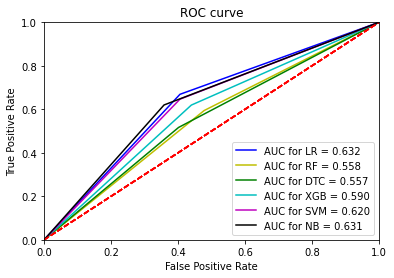

In [ ]:

'''This is the section that we performed modelling the dataset with four different ML algorithms'''
#importing all the libraries
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc


result_dict={}

colour=["b", "y", "g", "c", "m", "k"]
colour_counter=0

#Path to the cleaned data
path_to_csv2 = "./ml_ready.csv"

#Reading the csv file
data1=pd.read_csv(path_to_csv2,  header=None, skiprows=[0])
#Converting it into dataframes
data1=pd.DataFrame(data1)

#Breaking it into X and y
X=data1.values[:, 0: -1]
y=data1.values[:, -1]

# Divide the the dataset into test train split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42, shuffle=True)

#Trying out four different ML algorithms
model={"LR":LogisticRegression(), "RF":RandomForestClassifier() ,"DTC":DecisionTreeClassifier(), "XGB":XGBClassifier(), "SVM":SVC(), "NB":GaussianNB()}

#Iterating the model dict to fit the model
for ele in model.keys():
    model[ele].fit(X_train, y_train)
    pred=model[ele].predict(X_test)
    accu= accuracy_score(y_test, pred)
    result_dict[ele]=pred
    print("Accuracy of the model {} is {:.3f}%".format(ele, accu*100))

print("\n")

#Checking the classification report for each models
for ele in result_dict:
    
    class_report= classification_report(y_test, result_dict[ele])
    print("\nClassification report {}".format(ele))
    print("{}".format(class_report))

#Plotting the ROC curve for each model
for ele in result_dict:

    #Getting the FPR and TPR for the model using roc_curve scikit-learn function
    fpr, tpr, threshold = roc_curve(y_test, result_dict[ele])
    roc_auc = auc(fpr, tpr)

    #Plotting the ROC curve
    plt.title('ROC curve')
    plt.plot(fpr, tpr, colour[colour_counter], label = 'AUC for {} = %0.3f'.format(ele) % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1.0])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

    colour_counter+=1
#plt.savefig('./ROC_{}.eps'.format(ele), format='eps', dpi=150)
plt.show()


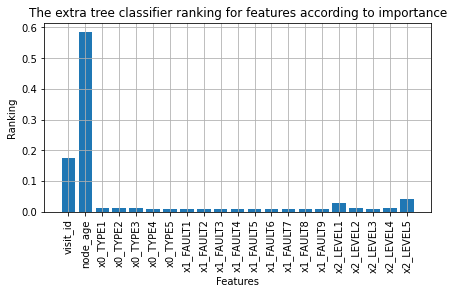

<Figure size 432x288 with 0 Axes>

In [ ]:

"""In this section we used ETC to rank the features of the model"""
#importing the libraries
from sklearn.ensemble import ExtraTreesClassifier
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

#Path to cleaned data
path_to_csv2= "./ml_ready.csv"

seed=110
#Reading the dataset 
data1=pd.read_csv(path_to_csv2)
#Getting the columns for later use
data_header= data1.columns
#Converting it to Dataframe
data1=pd.DataFrame(data1) 

#Splitting in X and y
X=data1.values[:, 0: -1]
y=data1.values[:, -1]

# Divide the the dataset into test train split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42, shuffle=True)

# feature extraction
model = ExtraTreesClassifier(random_state=seed)
#Fitting the model
model.fit(X_train, y_train)
#Getting the rankings
rank =model.feature_importances_
x= [i for i in range(len(data_header)-1)]

#Plotting the model
plt.xticks(x, data_header[:-1])
plt.xticks(range(len(data_header)-1), data_header[:-1], rotation=90)
plt.bar(x, rank)
plt.grid()
#plt.ylim((0.0,0.4))
plt.xlabel('Features')
plt.ylabel('Ranking')
plt.title("The extra tree classifier ranking for features according to importance")
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()
plt.cla()
plt.clf()

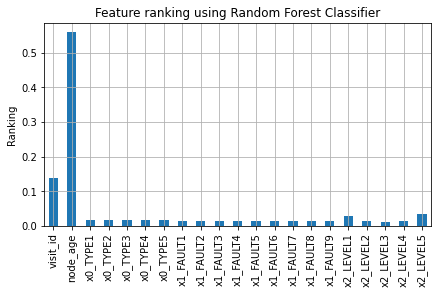

In [ ]:

"""This section uses Random Tree Classifer to rank the features. This show how the features contributed to the model"""
#importing libraries used
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

path_to_csv2 = "./ml_ready.csv"

#Reading the cleaned csv 
data1=pd.read_csv(path_to_csv2)
#Getting the csv header for a  later use
data_header= data1.columns
#Converting it into dataframe
data1=pd.DataFrame(data1)
#Breaking the dataset into X and y
X=data1.values[:, 0: -1]
y=data1.values[:, -1]

# Divide the the dataset into test train split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42, shuffle=True)

#Calling the random forest classifier
rf = RandomForestClassifier(random_state=0)
#Fitting the RF with the dataset
rf.fit(X_train, y_train)

#Getting the ranking of features
importances = rf.feature_importances_
forest_importances = pd.Series(importances, index=data_header[:-1])

#Plotting
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature ranking using Random Forest Classifier")
ax.set_ylabel("Ranking")
plt.grid()
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

/home/adeola/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


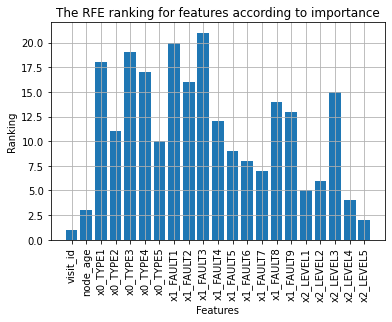

<Figure size 432x288 with 0 Axes>

In [ ]:

"""In this section, we used recursive feature elimination to rank features"""
#Importing libraries
from sklearn.feature_selection import RFE
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd


#Path to the cleaned data
path_to_csv2= "./ml_ready.csv"

#Reading the csv
data1=pd.read_csv(path_to_csv2)

#Getting the headers of the columns
data_header= data1.columns
data1=pd.DataFrame(data1)

#Getting the X and y from the dataset
X=data1.values[:, 0: -1]
y=data1.values[:, -1]

# Divide the the dataset into test train split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42, shuffle=True)

#Calling the logistic regression model
model = LogisticRegression()

rfe = RFE(model, 1)
fit = rfe.fit(X_train, y_train)
#print("Num Features: {}".format(fit.n_features_))
#print("Selected Features: {}".format(fit.support_))
#print("Feature Ranking: {}".format(fit.ranking_))
rank=fit.ranking_

x= [i for i in range(len(data_header)-1)]
plt.xticks(x, data_header[:-1])
plt.xticks(range(len(data_header)-1), data_header[:-1], rotation=90)
plt.bar(x, rank)
plt.grid()
#plt.ylim((0.0,0.4))
plt.xlabel('Features')
plt.ylabel('Ranking')
plt.title("The RFE ranking for features according to importance")
#plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.5)
plt.show()
plt.cla()
plt.clf()


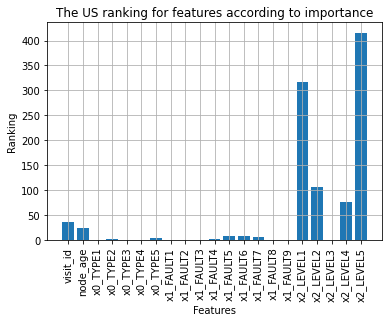

<Figure size 432x288 with 0 Axes>

In [ ]:
"""In this section we used Univariate Statistics for ranking"""
#importing the used libraries
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# load data 
seed=110

path_to_csv2= "./ml_ready.csv"

#Reading the csv
data1=pd.read_csv(path_to_csv2)

#Getting the header for the csv
data_header= data1.columns

#Converting it into dataframe
data1=pd.DataFrame(data1) 

#Converting the dataset into X and y
X=data1.values[:, 0: -1]
y=data1.values[:, -1]

# Divide the the dataset into test train split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42, shuffle=True)

# feature extraction
test = SelectKBest(score_func=chi2, k=10)
fit = test.fit(X_train, y_train)
# summarize scores
np.set_printoptions(precision=4)
rank= fit.scores_
#rank = fit.transform(X)

x= [i for i in range(len(data_header)-1)]

#Plotting
plt.xticks(x, data_header[:-1])
plt.xticks(range(len(data_header)-1), data_header[:-1], rotation=90)
plt.bar(x, rank)
plt.grid()
#plt.ylim((0.0,0.4))
plt.xlabel('Features')
plt.ylabel('Ranking')
plt.title("The US ranking for features according to importance")
#plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()
plt.cla()
plt.clf()